#### Show all of the test waveforms

This is a demonstration of the GIRF test waveforms and how to loop through them (it is not a complete sequence with any measurement elements).

In [ ]:
import pickle
from pathlib import Path

import numpy as np
from helpers import (
    PSeq_Base,
    PSeq_Params,
    PSeq_TestWave_Blip,
    PSeq_TestWave_BipolarChain,
    PSeq_TestWave_Chirp,
    # Pseq_TestWave_PRandom,
)

In [ ]:
# Setup base sequernce parameters
params = PSeq_Params(channels=('x', 'y', 'z'), max_grad=40, max_slew=140)

# This holds the full sequence
pseq0 = PSeq_Base(params)

all_test_class = []

all_test_class.append(PSeq_TestWave_Blip(params, do_adc=False))
all_test_class.append(PSeq_TestWave_Chirp(params, do_adc=False))
all_test_class.append(PSeq_TestWave_BipolarChain(params, do_adc=False))
# all_test_class.append(Pseq_TestWave_PRandom(params, do_adc=False))



In [7]:
pseq0.reinit_seq()
for pseq_test in all_test_class:
    for wave_idx in range(pseq_test.N_waves):
        pseq0 += pseq_test.build_blocks(idx=wave_idx)

Seq Time: 0:00:04
Timing check passed successfully


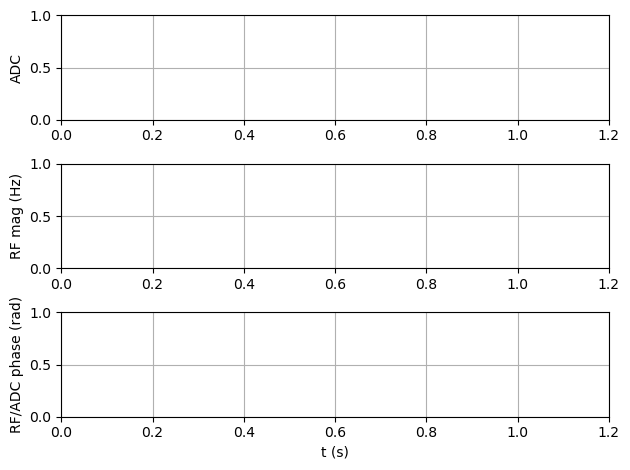

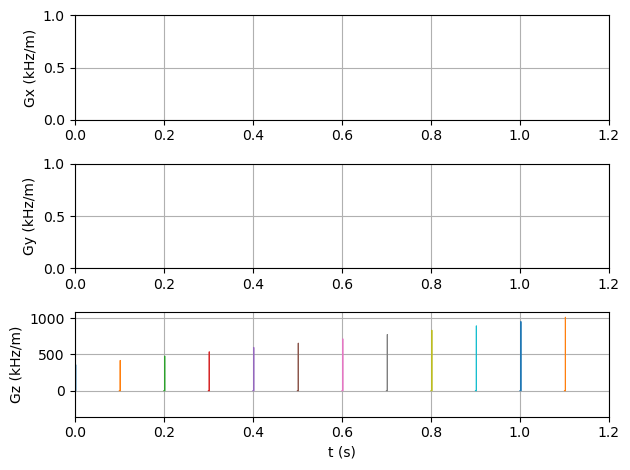

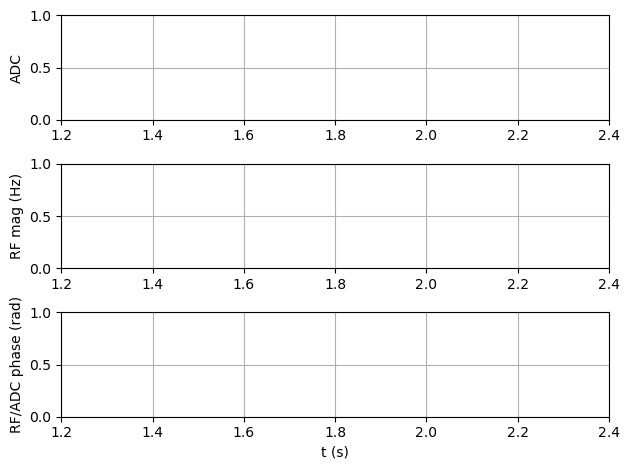

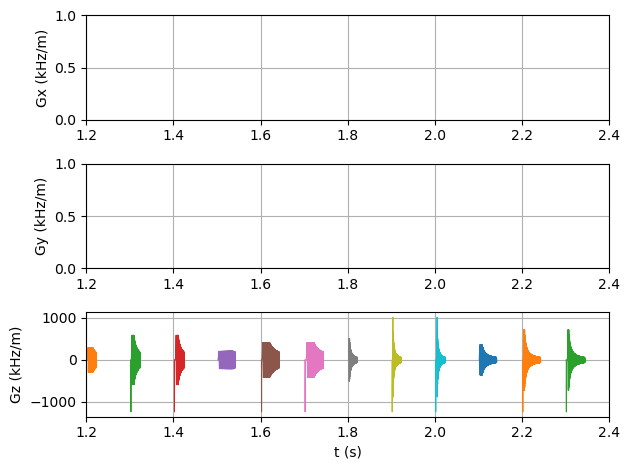

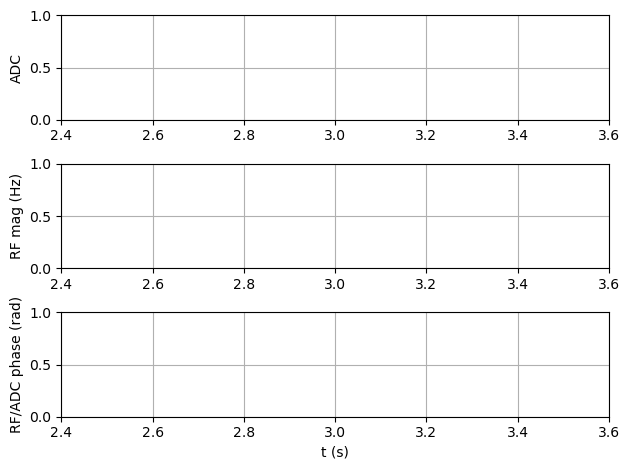

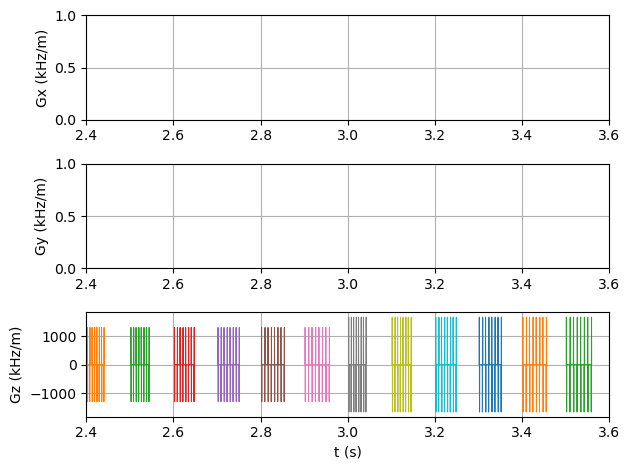

In [ ]:
pseq0.check()
pseq0.seq.plot(time_range=(0, 1.2))
pseq0.seq.plot(time_range=(1.2, 2.4))
pseq0.seq.plot(time_range=(2.4, 3.6))
# pseq0.seq.plot(time_range=(3.6, 4.8))